# Learning PyTorch
## Understanding Datasets and DataLoaders
Hey, I am Mukilan Krishnakumar and welcome to my repository for learning PyTorch. These notebooks are more so a learning tool for me rather than a teaching one.
I am learning PyTorch from variety of sources but primarily from PyTorch docs. As of learning (From 11th July, 2023), I am using PyTorch `2.0.1`. 

## 1. Loading Datasets
I am going to be using the `OxfordIIITPet` dataset. It has 37 categories (types of pets), it can be used for classification and segmentation. We are not building a model today, we will just explore few samples. 

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [69]:
training_data = datasets.OxfordIIITPet(
    root="data",
    split = "trainval",
    download=True,
    transform= ToTensor()
)

test_data = datasets.OxfordIIITPet(
    root="data",
    split = "test",
    download=True,
    transform= ToTensor()
)


## 2. Iterating and Visualizing a Dataset
We need to get the label mapping from categories to their IDs. We can easily do this through the `dataset.class_to_idx` method.

In [3]:
# Let us take training data
print(training_data.class_to_idx)

{'Abyssinian': 0, 'American Bulldog': 1, 'American Pit Bull Terrier': 2, 'Basset Hound': 3, 'Beagle': 4, 'Bengal': 5, 'Birman': 6, 'Bombay': 7, 'Boxer': 8, 'British Shorthair': 9, 'Chihuahua': 10, 'Egyptian Mau': 11, 'English Cocker Spaniel': 12, 'English Setter': 13, 'German Shorthaired': 14, 'Great Pyrenees': 15, 'Havanese': 16, 'Japanese Chin': 17, 'Keeshond': 18, 'Leonberger': 19, 'Maine Coon': 20, 'Miniature Pinscher': 21, 'Newfoundland': 22, 'Persian': 23, 'Pomeranian': 24, 'Pug': 25, 'Ragdoll': 26, 'Russian Blue': 27, 'Saint Bernard': 28, 'Samoyed': 29, 'Scottish Terrier': 30, 'Shiba Inu': 31, 'Siamese': 32, 'Sphynx': 33, 'Staffordshire Bull Terrier': 34, 'Wheaten Terrier': 35, 'Yorkshire Terrier': 36}


Notice that the output has interchanged "Keys" and "Values", let us fix it and store it in a variable called `label_map`

In [4]:
labels_map = dict((v,k) for k,v in training_data.class_to_idx.items())
print(labels_map)

{0: 'Abyssinian', 1: 'American Bulldog', 2: 'American Pit Bull Terrier', 3: 'Basset Hound', 4: 'Beagle', 5: 'Bengal', 6: 'Birman', 7: 'Bombay', 8: 'Boxer', 9: 'British Shorthair', 10: 'Chihuahua', 11: 'Egyptian Mau', 12: 'English Cocker Spaniel', 13: 'English Setter', 14: 'German Shorthaired', 15: 'Great Pyrenees', 16: 'Havanese', 17: 'Japanese Chin', 18: 'Keeshond', 19: 'Leonberger', 20: 'Maine Coon', 21: 'Miniature Pinscher', 22: 'Newfoundland', 23: 'Persian', 24: 'Pomeranian', 25: 'Pug', 26: 'Ragdoll', 27: 'Russian Blue', 28: 'Saint Bernard', 29: 'Samoyed', 30: 'Scottish Terrier', 31: 'Shiba Inu', 32: 'Siamese', 33: 'Sphynx', 34: 'Staffordshire Bull Terrier', 35: 'Wheaten Terrier', 36: 'Yorkshire Terrier'}


/var/folders/qp/h29sqr1j4qlg8r6r10m9q9xh0000gn/T/ipykernel_3888/3524628453.py:9: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1682343668887/work/aten/src/ATen/native/TensorShape.cpp:3575.)
  plt.imshow(img.T)


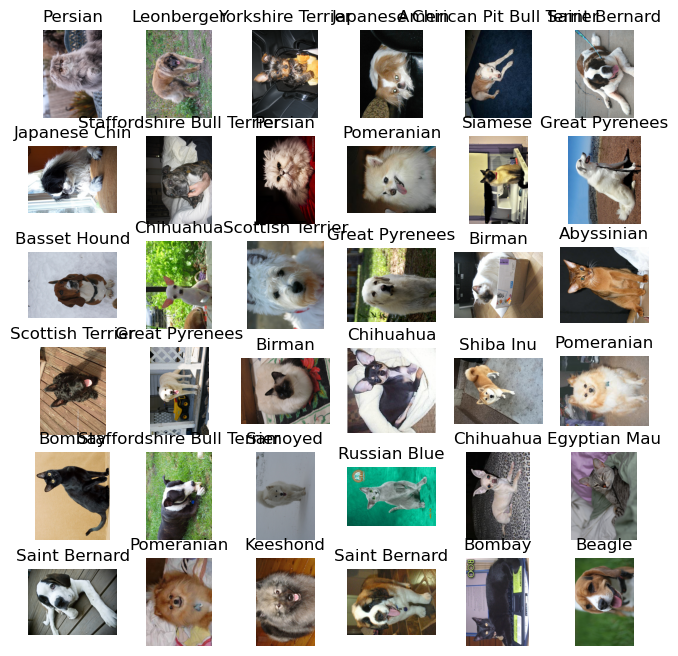

In [ ]:
figure = plt.figure(figsize=(8,8))
cols, rows = 6,6
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.T)
plt.show()

The problem with previous output happens to be the following error: `TypeError: Invalid shape (3, 225, 300) for image data`. We can solve this by `img.T` but that disorrients our image. THe best way to do this: `img.permute(1,2,0)`

sample_idx 3197
Label 27
sample_idx 3282
Label 29
sample_idx 2826
Label 19
sample_idx 2777
Label 18
sample_idx 991
Label 19
sample_idx 203
Label 4
sample_idx 3050
Label 24
sample_idx 3605
Label 35
sample_idx 2184
Label 6
sample_idx 2460
Label 12
sample_idx 1908
Label 1
sample_idx 845
Label 16
sample_idx 1066
Label 21
sample_idx 2776
Label 18
sample_idx 288
Label 5
sample_idx 2391
Label 10
sample_idx 1176
Label 23
sample_idx 2583
Label 14
sample_idx 2703
Label 17
sample_idx 3329
Label 29
sample_idx 3515
Label 33
sample_idx 3431
Label 32
sample_idx 1711
Label 34
sample_idx 1322
Label 26
sample_idx 1856
Label 0
sample_idx 2616
Label 15
sample_idx 1640
Label 32
sample_idx 1617
Label 32
sample_idx 2104
Label 5
sample_idx 128
Label 2
sample_idx 2515
Label 13
sample_idx 1372
Label 27
sample_idx 347
Label 6
sample_idx 318
Label 6
sample_idx 497
Label 9
sample_idx 481
Label 9


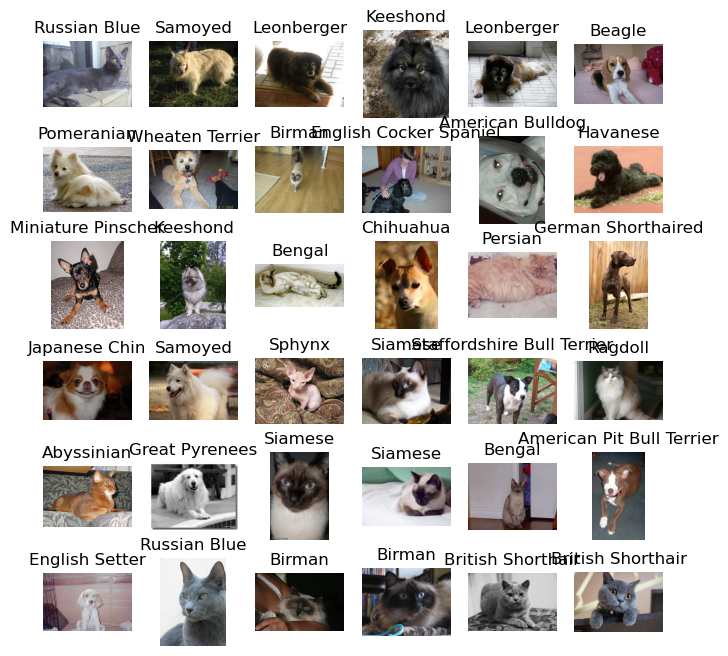

In [46]:
figure = plt.figure(figsize=(8,8))
cols, rows = 6,6
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    print("sample_idx", sample_idx)
    img, label = training_data[sample_idx]
    print("Label", label)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.permute(1,2,0))
plt.show()

## 3. Custom Dataset for our Data
Any Dataclass must have the following three methods:

    1. `__init__`
    2. `__len__`
    3. `__getitem__`

In [6]:
import os
import pandas as pd
from torchvision.io import read_image

In [8]:
# Testing out our data files - Annotations File to CSV
df = pd.read_csv(f"{training_data.root}/oxford-iiit-pet/annotations/trainval.txt", sep = " ", header = None)
df.head(5)

0  1  2  3
0  Abyssinian_100  1  1  1
1  Abyssinian_101  1  1  1
2  Abyssinian_102  1  1  1
3  Abyssinian_103  1  1  1
4  Abyssinian_104  1  1  1

In [11]:
# iloc is there to find the values at index (i) 
# Here the index is 200
df.iloc[200]

0    beagle_100
1             5
2             2
3             4
Name: 200, dtype: object

Now, we will be creating our Custom Dataset class. We will name it `PetImageDataset`. It has three methods, let us discuss them in brief.


1. `__init__` -> Runs when initialized, it gets initialized with annotations file, image directory and transforms.

2. `__len__` -> Returns the number of samples in dataset

3. `__getitem__` -> Given an index `idx`, it returns the image along with the label as tuple

A good question here would be: "Why use Dataset Classes in the first place? "

The main utility of `Dataset` is to retrieve our dataset's feature one sample at a time. We can automate this retrieval using the `DataLoader`. 

In [62]:
class PetImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform = None, target_transform = None):
        self.img_labels = pd.read_csv(annotations_file, sep = " ", header = None)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])+".jpg"
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            image = self.target_transform(label)
        return image, label
        

train_annotations_file = f"{training_data.root}/oxford-iiit-pet/annotations/trainval.txt"
test_annotations_file = f"{training_data.root}/oxford-iiit-pet/annotations/test.txt"
img_dir = f"{training_data.root}/oxford-iiit-pet/images"
training_dataset = PetImageDataset(annotations_file= train_annotations_file, img_dir= img_dir)
test_dataset = PetImageDataset(annotations_file= test_annotations_file, img_dir= img_dir)

I figured out much later while coding that the above block of code -> Creating a custom `Dataset` class for The Pets dataset was completely unneccesary, it has already been done. We literally used it in the second line, it is the `datasets.OxfordIIITPet`. They literally call it `class torchvision.datasets.OxfordIIITPet` in the docs

## 4. Preparing Data with DataLoaders
As we saw earlier `Dataset` classes are useful to only get features and labels of one sample at a time. Let us test it out.

Let's say, I want to see the `100` image, I want to identify its class and labels. Let us create a quick function, which can take in the index `idx` and display's the image along with the label. We will call this function `pets_display`.

In [50]:
def pets_display(idx):
    image = training_dataset[idx][0]
    image = image.permute(1,2,0)
    label_num = training_dataset[idx][1]
    label = labels_map[label_num]
    plt.title(label)
    plt.imshow(image)

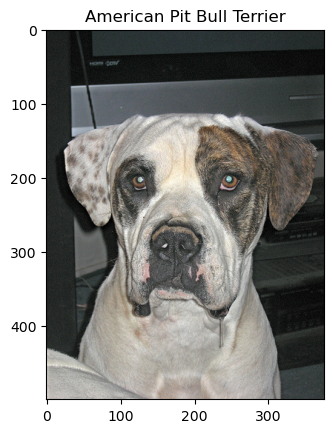

In [53]:
# Displaying the 99th image
pets_display(99)

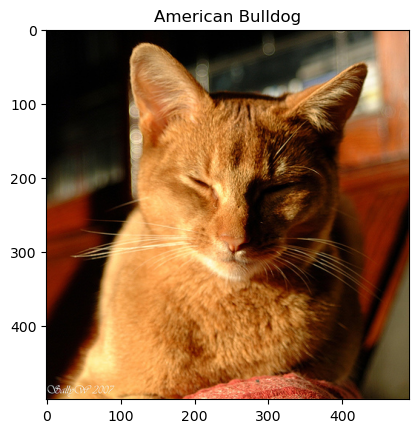

In [54]:
# Displaying the 13th image
pets_display(13)

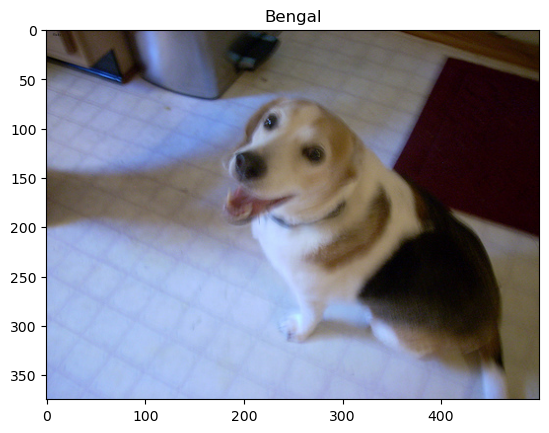

In [55]:
# Displaying the 240th image
pets_display(240)

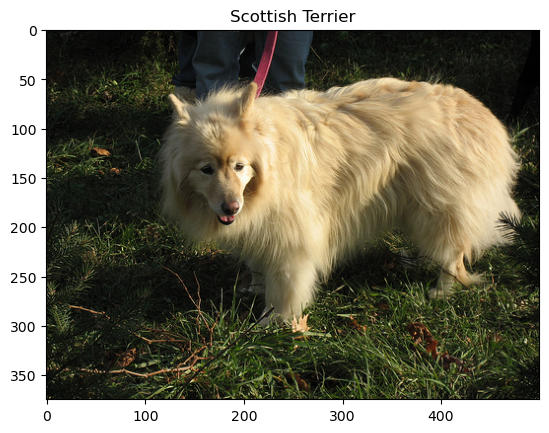

In [56]:
# Displaying the 3282th image
pets_display(3282)

Aha, we have some problem. The first image is pretty good, so we will ignore that. The last two are completely opposite: A Cat's image is given the label of Dog and vice-versa. By the way, Bengal is a type of Cat, I had to look it up.

Why is this happening? All we did was get the label from the first position of the annotation, right?

We ignored few things which are back again to bite us, remember to never ignore anything in the dataset.

The problem is with the annotation format. Most annotation formats are relatively easy, all we have to do is take a label_id and map it to the label_class. Example: let's say `Lion` is mapped to label `1`, `Tiger` is mapped to label `2` etc. Here, getting a label_class is very easy, get the label_num and map it. 

Our dataset, The Oxford-IIIT Pet Dataset, has the weirdest labeling I have ever seen. 

The annotation file has 4 columns. The first column being the image_name. The others are: `CLASS_ID, SPECIES, BREED ID`. 

		
        Image CLASS-ID SPECIES BREED ID
		ID: 1:37 Class ids
		SPECIES: 1:Cat 2:Dog
		BREED ID: 1-25:Cat 1:12:Dog
             
So, the IDs are arranged from 1 to 37, based on the `SPECIES` column we have to identify if we have `Cat` or `Dog`, and based on `BREED ID`, we have to map it to the correct breed. They are having conditional labeling. 

The easiest way to fix this is to have custom label mapping and not change any of the `Dataset` attributes. 
        
 

In [57]:
# The solution was the dumbest thing ever
# All we have to do is change the pets_display function
def pets_display(idx):
    image = training_dataset[idx][0]
    image = image.permute(1,2,0)
    # Labeling starts with 1 in the dataset, 0 in our mapping
    label_num = training_dataset[idx][1] - 1
    label = labels_map[label_num]
    plt.title(label)
    plt.imshow(image)

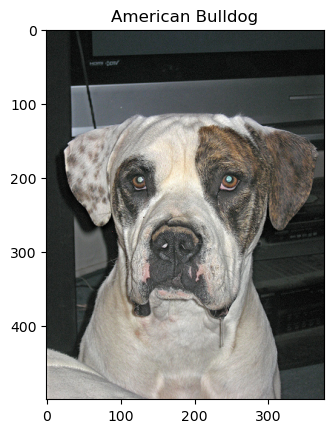

In [58]:
# Displaying the 99th image
pets_display(99)

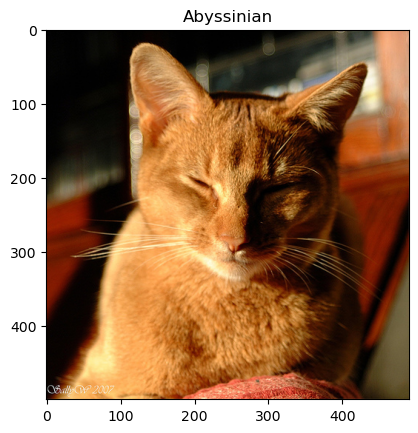

In [59]:
# Displaying the 13th image
pets_display(13)

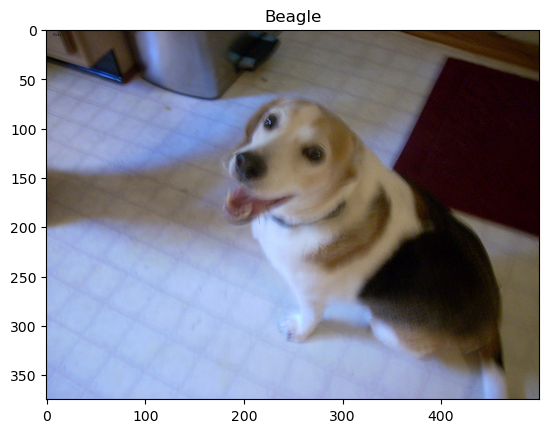

In [60]:
# Displaying the 240th image
pets_display(240)

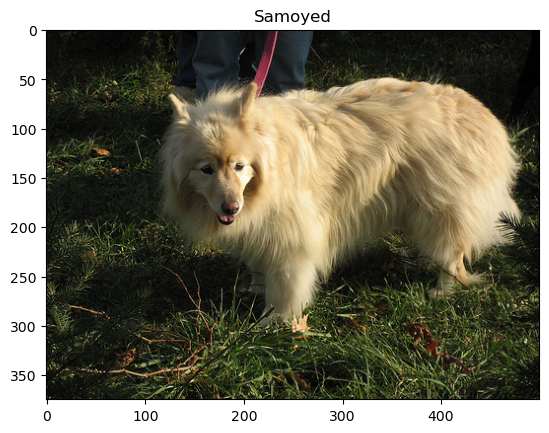

In [61]:
# Displaying the 3282th image
pets_display(3282)

Here's where I figured out that I don't need Custom Dataset for this.

On to `DataLoader`. It is an abstraction layer which helps us in lots of things - batching, reshuffling and multiprocessing are few examples.

In [77]:
from torch.utils.data import DataLoader

training_dataloader = DataLoader(training_data, batch_size= 1, shuffle= True)
test_dataloader = DataLoader(test_data, batch_size= 1, shuffle= True)

## 5. Iterating through the DataLoader

Each time we iterate through these training `DataLoader`s we will get training data along with labels of batch size 64. 

Feature batch shape: torch.Size([1, 3, 332, 500])
Labels batch shape: torch.Size([1])


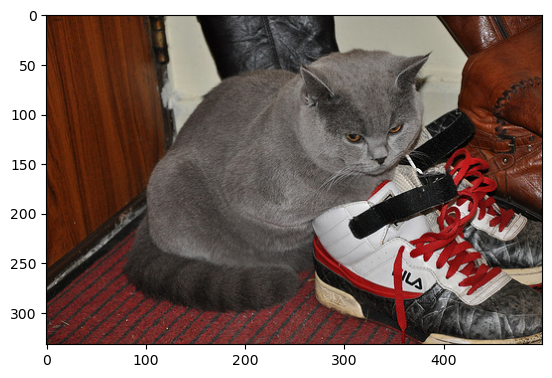

Label: 9


In [78]:
train_features, train_labels = next(iter(training_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1,2,0))
plt.show()
print(f"Label: {label}")

If you noticed the above code, you would see that the `batch_size` is set to one. That is because our images are apparently of different sizes. This would confuse the tensor as it tries to stack them all when we set `batch_size` > 1. The solution to fixing this has to do with something called the `collate_fn` which can be written customly. To learn more about this visit [here](https://discuss.pytorch.org/t/runtimeerror-stack-expects-each-tensor-to-be-equal-size-but-got-3-224-224-at-entry-0-and-3-224-336-at-entry-3/87211/22)

I have to learn a lot more about `collate_fn` and others. But as of now, we can end the Datasets and DataLoaders section. 

If you like what you read and are curious -> read the docs.